In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [4]:
df.shape

(299, 13)

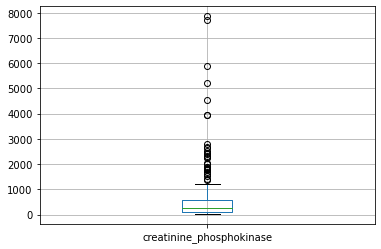

In [5]:
df.boxplot(column = ['creatinine_phosphokinase']);

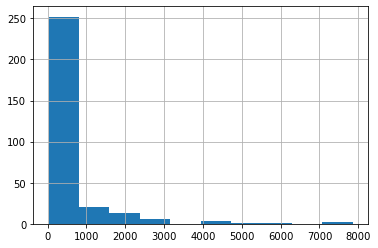

In [6]:
df.creatinine_phosphokinase.hist();

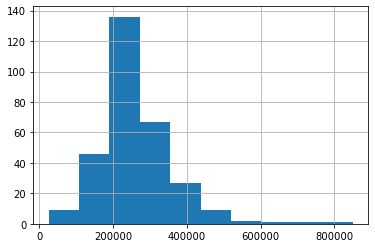

In [7]:
df.platelets.hist();

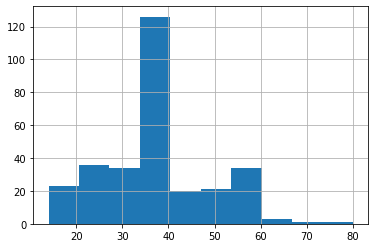

In [8]:
df.ejection_fraction.hist();

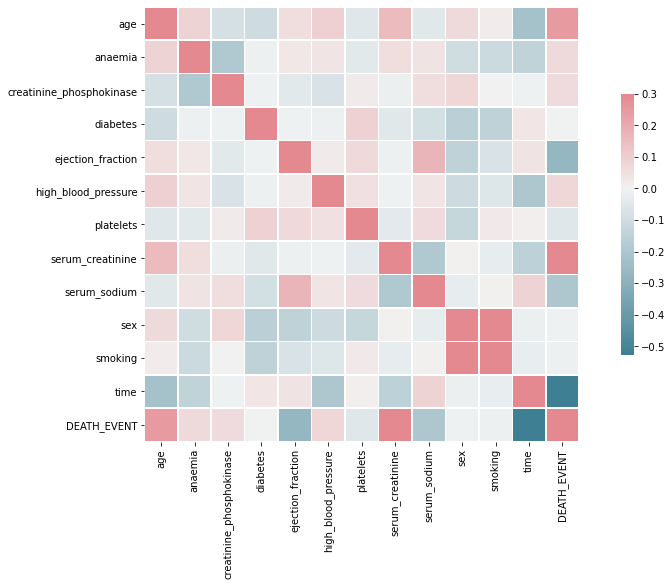

In [9]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.subplots(figsize=(15,8))
sns.heatmap(df.corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .6});

In [10]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


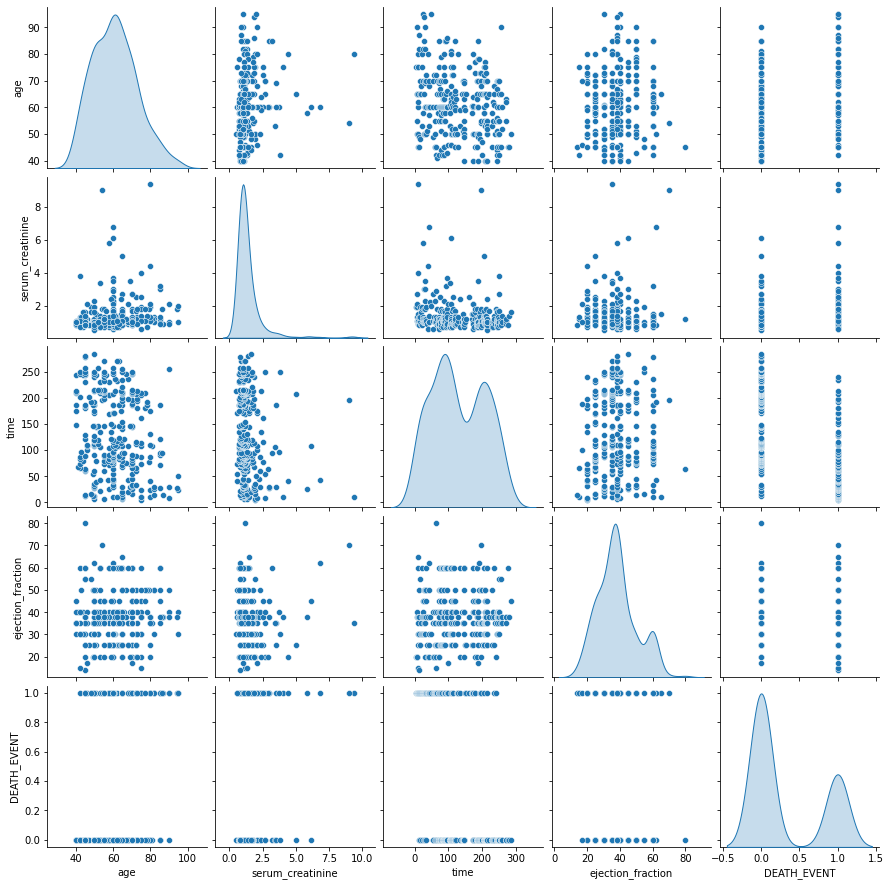

In [11]:
#death event extra rausnehmen
sns.pairplot(df[['age','serum_creatinine','time','ejection_fraction','DEATH_EVENT']], diag_kind='kde');

In [12]:
target = df.pop('DEATH_EVENT')


0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

Preprocessing: 
1.Split data into train/val set
2.standardize train set and apply train mean and std on val set
3.(optional) apply PCA on the train set and transform val set with pc of train set 
4.(optional) apply SMOTE on train set

In [13]:
##split
X_train, X_val, y_train, y_val = train_test_split(df.drop(columns='time'),target, test_size=0.33, random_state=3)

##standardize (around 71% acc on val set)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

##pca (around 76% acc on val set)
pca = PCA(n_components=5)
X_train_pca = pd.DataFrame(data = pca.fit_transform(X_train), columns=['pc1','pc2','pc3','pc4','pc5'])
X_val_pca=pd.DataFrame(data = pca.transform(X_val), columns=['pc1','pc2','pc3','pc4','pc5'])


#smote (around 80% acc on val set)
oversample = SMOTE()
X_train_sm, y_train_sm = oversample.fit_resample(X_train, y_train)

#pca and smote (around 75% acc on val set )
X_train_sm_pca, y_train_sm_pca=oversample.fit_resample(X_train_pca, y_train)


In [14]:
print(pca.singular_values_)
print(pca.explained_variance_ratio_)
print(X_train_pca.head())

[17.98050352 16.6513605  16.0315587  15.19066351 14.09663182]
[0.14695387 0.12603082 0.11682312 0.10488921 0.09032501]
        pc1       pc2       pc3       pc4       pc5
0  1.233458 -0.273568 -2.405028  0.241348  0.000832
1 -0.580787  0.525886 -2.733573  0.679662 -1.592712
2  2.095091  0.566619  0.352979 -1.574252  0.657103
3 -1.829235  0.395344  0.920711 -0.972227 -0.133415
4  0.398288 -1.314142  0.811338  1.637727 -0.661691


In [15]:
#create dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(len(df)).batch(1)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(1)

In [16]:
df.drop(columns="time").describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000


In [17]:
def get_compiled_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

    model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
    return model

In [18]:
model = get_compiled_model()
model.fit(train_dataset, epochs=12, validation_data=val_dataset)

Epoch 1/12
200/200 [==============================] - 3s 8ms/step - loss: 0.7474 - accuracy: 0.6400 - val_loss: 0.6655 - val_accuracy: 0.6869
Epoch 2/12
200/200 [==============================] - 1s 4ms/step - loss: 0.6479 - accuracy: 0.6850 - val_loss: 0.6167 - val_accuracy: 0.6869
Epoch 3/12
200/200 [==============================] - 1s 4ms/step - loss: 0.5980 - accuracy: 0.6900 - val_loss: 0.5952 - val_accuracy: 0.6869
Epoch 4/12
200/200 [==============================] - 1s 4ms/step - loss: 0.5669 - accuracy: 0.6950 - val_loss: 0.5841 - val_accuracy: 0.6970
Epoch 5/12
200/200 [==============================] - 1s 4ms/step - loss: 0.5396 - accuracy: 0.7500 - val_loss: 0.5736 - val_accuracy: 0.7071
Epoch 6/12
200/200 [==============================] - 1s 3ms/step - loss: 0.5192 - accuracy: 0.7600 - val_loss: 0.5684 - val_accuracy: 0.7071
Epoch 7/12
200/200 [==============================] - 1s 4ms/step - loss: 0.5024 - accuracy: 0.7650 - val_loss: 0.5677 - val_accuracy: 0.7374
Epoch 

In [19]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 1])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='train_acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.ylim([0, 1])
    plt.xlabel('Epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.grid(True)
    
def show_confusion_matrix(cm, labels):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, xticklabels=labels, yticklabels=labels, 
              annot=True, fmt='g')
    plt.xlabel('Prediction')
    plt.ylabel('Label')
    plt.show()



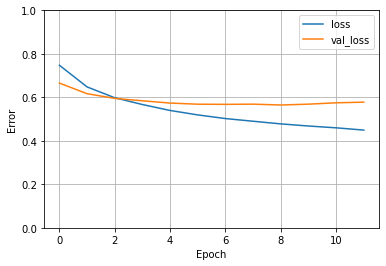

In [20]:
plot_loss(model.history)

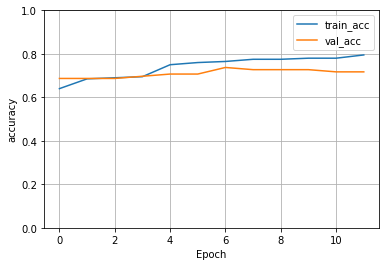

In [21]:
plot_accuracy(model.history)    


C:\Users\GEBI002\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


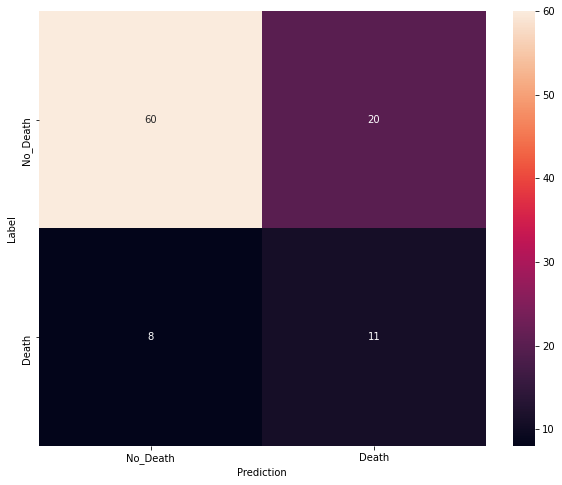

In [22]:
confusion_mtx = tf.math.confusion_matrix(
    model.predict_classes(X_val),
    y_val,
    num_classes=2)

show_confusion_matrix(confusion_mtx, ['No_Death', 'Death'])

In [23]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_sm, y_train_sm)).shuffle(len(df)).batch(1)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(1)

In [24]:
model = get_compiled_model()
model.fit(train_dataset, epochs=12, validation_data=val_dataset)

Epoch 1/12
270/270 [==============================] - 3s 10ms/step - loss: 0.7657 - accuracy: 0.5000 - val_loss: 0.6271 - val_accuracy: 0.6869
Epoch 2/12
270/270 [==============================] - 1s 5ms/step - loss: 0.6717 - accuracy: 0.5111 - val_loss: 0.6241 - val_accuracy: 0.6768
Epoch 3/12
270/270 [==============================] - 1s 4ms/step - loss: 0.6265 - accuracy: 0.5370 - val_loss: 0.6143 - val_accuracy: 0.6869
Epoch 4/12
270/270 [==============================] - 1s 3ms/step - loss: 0.5965 - accuracy: 0.6037 - val_loss: 0.6094 - val_accuracy: 0.7071
Epoch 5/12
270/270 [==============================] - 1s 4ms/step - loss: 0.5695 - accuracy: 0.6481 - val_loss: 0.6140 - val_accuracy: 0.7071
Epoch 6/12
270/270 [==============================] - 1s 3ms/step - loss: 0.5462 - accuracy: 0.6556 - val_loss: 0.6067 - val_accuracy: 0.7172
Epoch 7/12
270/270 [==============================] - 1s 3ms/step - loss: 0.5248 - accuracy: 0.6778 - val_loss: 0.5916 - val_accuracy: 0.7273
Epoch

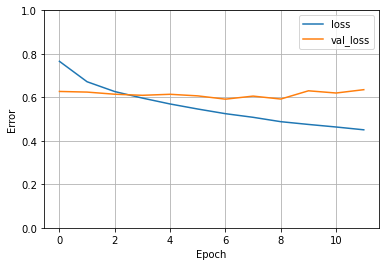

In [25]:
plot_loss(model.history)

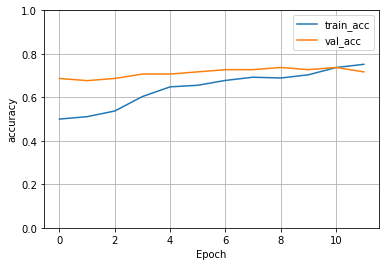

In [26]:
plot_accuracy(model.history)

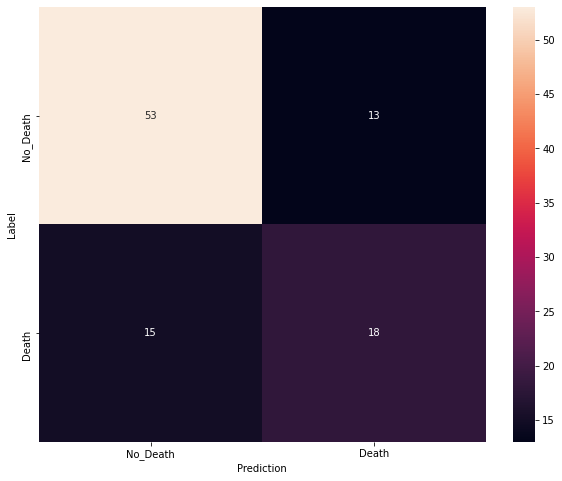

In [27]:
confusion_mtx = tf.math.confusion_matrix(
    model.predict_classes(X_val),
    y_val,
    num_classes=2)

show_confusion_matrix(confusion_mtx, ['No_Death', 'Death'])

In [ ]:
# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()